In [0]:
!git clone https://gitlab.com/rohitgade/afcars.git

Cloning into 'afcars'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 92 (delta 16), reused 79 (delta 11)
Unpacking objects: 100% (92/92), done.


In [0]:
predict = 'EVERADPT'


## Reading the data
* Reading the data into a `data` var.

In [0]:
import pandas as pa
import numpy as np

file = '/content/afcars/data/NCAANDS.csv'

def strtodate(str):
  return pa.to_datetime(str)
def statestonum(x):
  return d[x]
cl = ['DOB','PedRevDt','Rem1Dt','RemTrnDt','DLstFCDt','LatRemDt','CurSetDt','DoDFCDt','DoDTrnDt','TPRMomDt','TPRDadDt','TPRDate']
data = pa.read_csv(file,encoding='ISO-8859-1',parse_dates=cl) 
data[cl] = data[cl].astype(np.int64)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#  Conveting Columns with dates into datetime 
# def convdate(col):  
#   temp = pa.to_datetime(data[col])
#   data[col] = temp

# cl = ['DOB','PedRevDt','Rem1Dt','RemTrnDt','DLstFCDt','LatRemDt','CurSetDt','DoDFCDt','DoDTrnDt','TPRMomDt','TPRDadDt','TPRDate']
# for c in cl:
#   convdate(c)
#   print(c,end='->Done\n')

## Converting `St` Column into Numaric values.

In [0]:
d = {'AK': 0,'AL': 1,'AR': 2, 'AZ': 3,'CA': 4,'CO': 5,'CT': 6,'DC': 7,'DE': 8,'FL': 9,'GA': 10,'HI': 11,'IA': 12,'ID': 13,
 'IL': 14,'IN': 15,'KS': 16,'KY': 17,'LA': 18,'MA': 19,'MD': 20,'ME': 21,'MI': 22,'MN': 23,'MO': 24,'MS': 25,'MT': 26,'NC': 27,
 'ND': 28,'NE': 29,'NH': 30,'NJ': 31,'NM': 32,'NV': 33,'NY': 34,'OH': 35,'OK': 36,'OR': 37,'PA': 38,'PR': 39,'RI': 40,
 'SC': 41,'SD': 42,'TN': 43,'TX': 44,'UT': 45,'VA': 46,'VT': 47,'WA': 48,'WI': 49,'WV': 50,'WY': 51}
data['St'] = data['St'].apply(lambda x : d[x])

KeyError: ignored

## Non Numaric Coloums

In [0]:
data.dtypes[(data.dtypes == 'object')]

RecNumbr    object
StFCID      object
dtype: object

## Deleting Unwated Columns

In [0]:
del(data['RecNumbr'])
del(data['StFCID'])

## Displying the Dataframe

In [0]:
data.head()

FY  Version  STATE  St  REPDATYR  ...  IsTPR  AgedOut  RaceEthn  Race  RU13
0  2017        2      1   1      2018  ...      0        0         6     6   3.0
1  2017        2      1   1      2018  ...      0        0         7     1   1.0
2  2017        2      1   1      2018  ...      0        0         2     2   3.0
3  2017        2      1   1      2018  ...      0        0         2     2   3.0
4  2017        2      1   1      2018  ...      0        0         1     1   3.0

[5 rows x 103 columns]

## Displaying basic stats of the data.

In [0]:
data.describe()

FY   Version  ...           Race           RU13
count  691188.0  691188.0  ...  691188.000000  691161.000000
mean     2017.0       2.0  ...       6.952181       2.417320
std         0.0       0.0  ...      21.857496       1.928068
min      2017.0       2.0  ...       1.000000       1.000000
25%      2017.0       2.0  ...       1.000000       1.000000
50%      2017.0       2.0  ...       1.000000       2.000000
75%      2017.0       2.0  ...       2.000000       3.000000
max      2017.0       2.0  ...      99.000000       9.000000

[8 rows x 103 columns]

## Finding columns with Nan values with total num of Nan's Greater than 40 %
  

In [0]:
cols = data.columns[data.isna().mean() > 0.4].values

In [0]:
cols

array(['CTK2YR', 'FCCTK2YR', 'RF2AMAKN', 'RF2ASIAN', 'RF2BLKAA',
       'RF2NHOPI', 'RF2WHITE', 'RF2UTOD', 'PreviousLOS'], dtype=object)

## Droping Columns which has more than 40% of Nan's in them

In [0]:
newdata = data.drop(cols,axis=1)

In [0]:
newdata.describe()

FY   Version  ...           Race           RU13
count  691188.0  691188.0  ...  691188.000000  691161.000000
mean     2017.0       2.0  ...       6.952181       2.417320
std         0.0       0.0  ...      21.857496       1.928068
min      2017.0       2.0  ...       1.000000       1.000000
25%      2017.0       2.0  ...       1.000000       1.000000
50%      2017.0       2.0  ...       1.000000       2.000000
75%      2017.0       2.0  ...       2.000000       3.000000
max      2017.0       2.0  ...      99.000000       9.000000

[8 rows x 94 columns]

## Filling Nan's with median values of their field and its stats

In [0]:
filldata = newdata.fillna(data.median())

In [0]:
filldata.describe()

FY   Version  ...           Race           RU13
count  691188.0  691188.0  ...  691188.000000  691188.000000
mean     2017.0       2.0  ...       6.952181       2.417303
std         0.0       0.0  ...      21.857496       1.928033
min      2017.0       2.0  ...       1.000000       1.000000
25%      2017.0       2.0  ...       1.000000       1.000000
50%      2017.0       2.0  ...       1.000000       2.000000
75%      2017.0       2.0  ...       2.000000       3.000000
max      2017.0       2.0  ...      99.000000       9.000000

[8 rows x 94 columns]

In [0]:
# filldata = filldata.drop(filldata[filldata[predict]== 3.0].index.to_list())

In [0]:
plot  = filldata[predict].plot.pie(figsize=(5, 5))
plot

In [0]:
# filldata.to_csv(r'/content/drive/My Drive/Colab Notebooks/Data/filldata.csv')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

## Making a Balanced dataset

In [0]:
from sklearn.utils import resample

In [0]:
count = filldata[predict].value_counts()

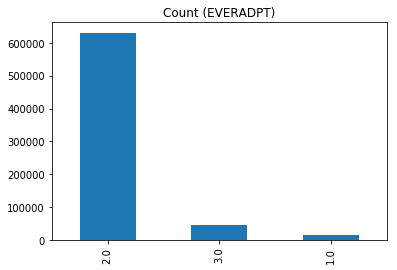

In [0]:
count.plot(kind='bar', title='Count (EVERADPT)');

EVERADPT - 2.0 : 630426 <br>
EVERADPT - 1.0 : 15939 <br>
Total Colums : 691188

In [0]:
# del filldata[filldata[predict] == 3]

In [0]:
nd = filldata.drop(filldata[filldata[predict] == 3].index.to_list())

In [0]:
labes

2.0    630426
1.0     15939
Name: EVERADPT, dtype: int64

##  -- Incomplete--

## Ploting Col-relation between columns

In [0]:
# corr = filldata.corr()

In [0]:
# import matplotlib.pyplot as plt
# plt.matshow(corr)
# # plt.show()

In [0]:
# f = plt.figure(figsize=(15, 15))
# plt.matshow(corr, fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

# Creating Random Forest Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [0]:
Y = filldata[predict]

In [0]:
# del filldata['EVERADPT']

In [0]:
train_x,test_x,train_y,test_y = train_test_split(filldata,Y,train_size=0.7)

In [0]:
clf = RandomForestClassifier(n_estimators=90)

 -------------- ----------------------

## Performing Cross validation with different `n_estimators` .

In [0]:
param_grid = {'n_estimators': [25, 30, 35, 40,45,50,55,60,65,70,75,80,85,90,95,100],}

In [0]:
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

## Results

In [0]:
grid_clf. best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
grid_clf.best_params_

{'n_estimators': 90}

In [0]:
grid_clf.best_score_

0.9998925244558534

## Cross Validation Results for every value

In [0]:
grid_clf.cv_results_

{'mean_fit_time': array([ 27.99765065,  34.25816669,  38.64840829,  44.80010288,
         50.6839767 ,  57.61673176,  61.37612166,  69.62130113,
         72.18419387,  75.37626996,  84.97442987,  95.04667711,
         98.75618398,  96.48505914, 102.91840484, 110.31737726]),
 'mean_score_time': array([0.33214447, 0.39724672, 0.41584129, 0.48322847, 0.56124265,
        0.603953  , 0.65702817, 0.74903839, 0.80901189, 0.87810264,
        0.96730964, 1.00774863, 1.05488484, 1.12831187, 1.13312213,
        1.20097461]),
 'mean_test_score': array([0.99973751, 0.99980985, 0.99978092, 0.99984912, 0.99982019,
        0.99987806, 0.99980158, 0.99985532, 0.99982639, 0.99986772,
        0.99985946, 0.99987599, 0.99984499, 0.99989252, 0.99982845,
        0.99986566]),
 'param_n_estimators': masked_array(data=[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
                    95, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fals

In [0]:
# grid_clf.scoring
# dir(grid_clf)  

## Training the Random Forest Model.

In [0]:
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Testing the Trained Model Performance 


In [0]:
results = clf.predict(test_x)

In [0]:
accuracy_score(test_y,results)

0.9998842575847452

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(test_y,results)
print(classification_report(test_y,results))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      4856
         2.0       1.00      1.00      1.00    189118
         3.0       1.00      1.00      1.00     13383

    accuracy                           1.00    207357
   macro avg       1.00      1.00      1.00    207357
weighted avg       1.00      1.00      1.00    207357



# Support Vector Machines 


In [0]:
svclassifier.fit(train_x,train_y)

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

In [0]:
# results = svclassifier.predict(test_x)

# ------------------------------------------------------------

# Week - 5 Test

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pa

In [0]:
filedata = '/content/drive/My Drive/Colab Notebooks/Data/filldata.csv'

In [0]:
data = pa.read_csv(filedata)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
# del data[data[predict] == 3.0]
data = (data[data[predict] != 3.0] )

In [20]:
data[predict].value_counts()

2.0    630426
1.0     15939
Name: EVERADPT, dtype: int64

In [0]:
class_1,class_2 = data[data[predict] != 2.0],data[data[predict] != 1.0]

In [0]:
c1,c2 = class_1[predict].value_counts(),class_2[predict].value_counts()

In [23]:
c1.values[0]

15939

In [0]:
class_2 = class_2.sample(n=c1.values[0])

In [0]:
bal_data = pa.concat([class_1,class_2])

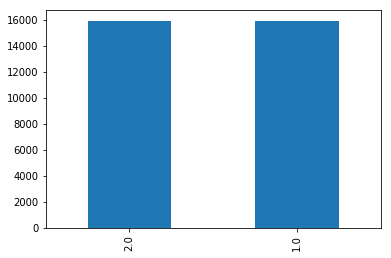

In [26]:
bal_data[predict].value_counts().plot(kind='bar')

In [0]:
Y = bal_data[predict]
X = bal_data.drop(predict,axis=1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)

In [0]:
clf = RandomForestClassifier(n_estimators=90)

In [30]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
results = clf.predict(X_test)

In [0]:
# Y_test.value_counts().plot(kind='bar')

In [0]:
# accuracy_score(Y_test,results)

In [0]:
test  = data.drop(predict,axis=1)

In [0]:
Y = data[predict]

In [0]:
rt = clf.predict(test)

In [41]:
accuracy_score(Y,rt)

0.9945603490287995

In [0]:
feature_imp = pa.Series(clf.feature_importances_).sort_values(ascending=False)
# feature_imp

In [0]:
# # Y_train
# X_train['AGEADOPT'] #

In [0]:
feature_imp = feature_imp * 100

In [84]:
sum(feature_imp[:50])

97.65925379016024

In [0]:
l = []
col = data.columns.values
for i in feature_imp[:45].index.values: 
  l.append(col[i])

In [0]:
small = data[l]

In [0]:
f = round(feature_imp,3) * 100

In [0]:
# kind='barh',figsize=(15,40)

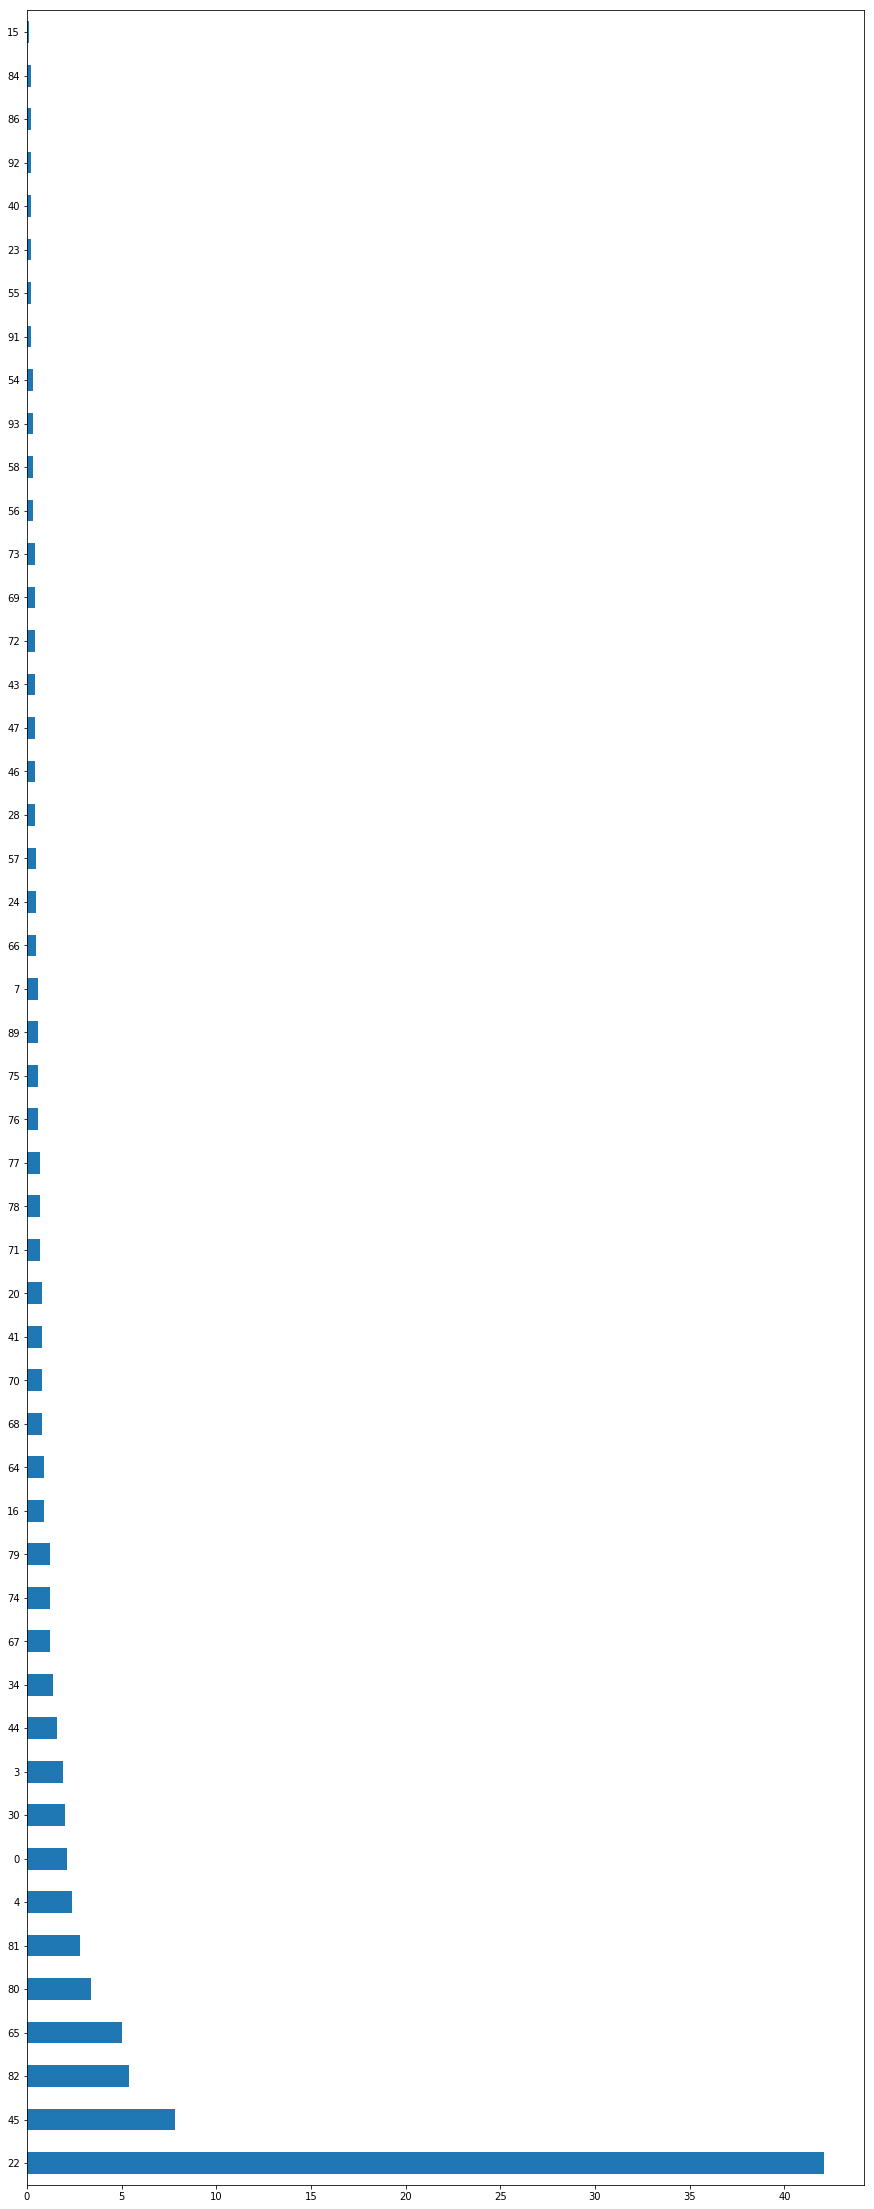

In [92]:
f[f != 0.000][:50].plot(kind='barh',figsize=(15,40))

In [0]:
clf = RandomForestClassifier(n_estimators=90)

In [0]:
Y = small[predict]
X = small.drop(predict,axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)

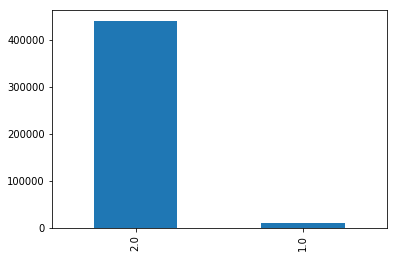

In [106]:
Y_train.value_counts().plot(kind='bar')

In [0]:
train = X.copy()

In [0]:
train[predict] = Y

In [0]:
class_2,class_1 = train[predict].value_counts().values

In [0]:
X = train[train[predict]!=1.0].sample(class_1)

In [0]:
Y = train[train[predict]!=2.0]

In [0]:
train = pa.concat([X,Y])

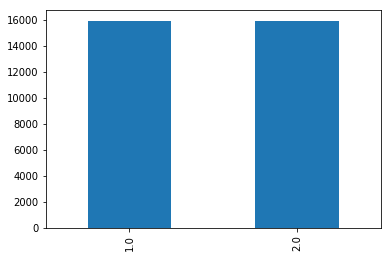

In [125]:
train[predict].value_counts().plot(kind='bar')

In [0]:
X_train = train.drop(predict,axis=1)
Y_train = train[predict]

In [127]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rt = clf.predict(X_test)

In [0]:
# len(X_test)

In [129]:
accuracy_score(Y_test,rt)

0.9956887215718633

In [141]:
confusion_matrix(Y_test,rt)

array([[  4788,      0],
       [   836, 188286]])

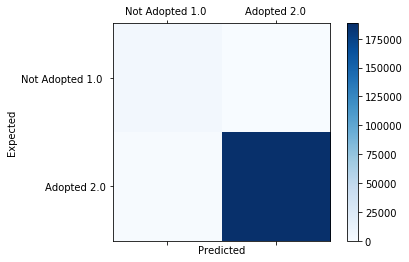

In [138]:
from sklearn.metrics import confusion_matrix


labels = ['Not Adopted 1.0 ', 'Adopted 2.0']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(Y_test,rt), cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Visivalizing InBalanced Data